# K-Means (K-Ortalam) :

NASIL ÇALIŞIR ?

-kaç küme olacağı kullanıcıdan parametre olarak seçilir (bu kullanıcıdan alındığı için eksi bir özelliktir.)

-rastgele olarak k merkez noktası seçilir .

-her veri örneği en yakın merkez noktasına göre ilgili kümöeye atanır . 

-her küme için yeni merkez noktaları hesaplanarak merkez noktaları kaydırılır . 








her nokta bizim için aynıdır hiçbir farkı yoktur kadındır erkektir vs diye bir şey yoktur verilerin birbirine mesafesine göre makine öğrenir .  



# K-Means başlangıç noktası tuzağı : 

şimdi bu algoritmanın bazı problemleri vardır bazı sıkınıtıları görelim : 

bu problem K-Means++ ile çözülebilir : 

1-rastgele seçilen noktalardan en yakınına her noktadan uzaklığı hesapla (buna D(x) diyelim )

2-yeni noktaları mesafenin karesini olasılık alarak (D(x)^2 ile bul!!!)

# K-Means küme/bölüt sayısna karar  verme : 

--K değerini burada biz veriyoruz yani clustring değerini veriyoruz ama kaç tane vermeliyiz bu önemlidir ... 

--X-Means ile verdiğiniz aralıktakileri dener 

--K-Means ile de wcss yöntemi bulunmaktadır...

--WCSS değerlerine dikkat etmen gerekir mükemmel olsun 0 çıksın istersek her bir data pointe bir nokta atar tam istediğimizi vermez yani unutma !!! bu overfittinge sebep olur 

--eğimin kırıldığı noktaya bakılır bu nokta bizim için optimal noktadır ve seçilir!!!

--K değerini böyle saptayabiliriz elimizde gruplar yoksa bunu deneriz 

--ön tanım yoksa bu hesabı yapmak gerekir 


# Sample Code 

import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def calculate_wcss(data, centroids, labels):
    wcss = 0
    for i in range(len(data)):
        centroid_index = labels[i]
        wcss += calculate_distance(data[i], centroids[centroid_index]) ** 2
    return wcss

def k_means(data, k, max_iterations=100):
    # Randomly initialize centroids
    centroids = data[np.random.choice(len(data), k, replace=False)]
    
    for _ in range(max_iterations):
        # Assign points to the nearest centroid
        labels = np.argmin([np.linalg.norm(data - centroid, axis=1) for centroid in centroids], axis=0)
        
        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
    return centroids, labels

data = np.array([
    [2, 3],
    [5, 8],
    [1, 6],
    [8, 4],
    [9, 1]
])

# Farklı küme sayıları için WCSS değerlerini hesapla
k_values = range(1, 6)
wcss_values = []
for k in k_values:
    centroids, labels = k_means(data, k)
    wcss_values.append(calculate_wcss(data, centroids, labels))

# WCSS değerlerini görselleştir
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('WCSS Değeri')
plt.title('Dirsek Kuralı ile Optimal Küme Sayısı Belirleme')
plt.show()

In [1]:
#sklearn'e bak kmeans ile 
#clustering sklearn'e giderek veri çeşitlerinden farklı algoritmlaarı kullanma şansın var onları incele 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 



In [2]:
veriler = pd.read_csv("musteriler.csv")

In [3]:
veriler.head()
#dikkat et id ksımını vs kullanmayız çünkü veri için ek bilgi sunmuyor 


,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [4]:
X= veriler.iloc[:,3:]

In [5]:
X
#yaşını ve ne kadar hacimde iş yaptığı bilgisini aldık!!!

,Hacim,Maas
0,69900,6325
1,79000,5200
2,85500,7825
3,17100,8375
4,5500,5450
...,...,...
195,96600,7900
196,83700,7675
197,34000,4000
198,42000,5500


In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans=KMeans(n_clusters = 4, init = 'k-means++')

In [8]:
kmeans.fit(X)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [9]:
print(kmeans.cluster_centers_)
#3 adet dediğimiz için 3 farklı merkez noktası verdi 


[[ 81588.46153846   6765.38461538]
 [ 16483.33333333   5422.91666667]
 [122140.           8000.        ]
 [ 44848.52941176   5201.47058824]]


In [10]:
sonuclar = []
for i in range(1,11) : 
    kmeans = KMeans(n_clusters = i , init = 'k-means++',random_state = 123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_) #bu wcss değerlerimizdir 

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
sonuclar

[242389902746.875,
 69083288306.74911,
 37362865661.973114,
 19665039712.795002,
 12911353632.710129,
 8631933632.93952,
 6759928141.384078,
 5301517432.980297,
 4172822197.446949,
 3330255811.5491543]

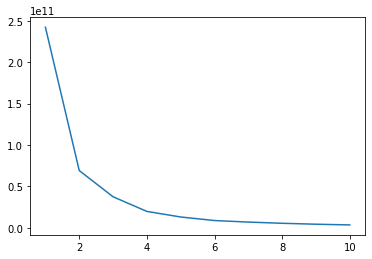

In [12]:
plt.plot(range(1,11),sonuclar)
#görüldüğü üzere 2 noktasında büyük bir eğim değişikliği var 
# bu eğim değişikliği bizim optimal noktamızdır 

işte buna göre k değerini yani n_clusters değerini atarız 

bu değerle beraber doğru clusters sayımızı bulmuş olduk 



In [13]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++',random_state = 123)
Y_tahmin =  kmeans.fit_predict(X)
print(Y_tahmin)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 1 1 1 1 2 1 3 3 2 3 1 2 0 2 1 2 2 1 1 2 3 0 3 1 2 1 3 1 3 3 2 3 3 3
 1 3 0 0 1 2 1 1 3 3 3 3 0 1 2 0 0 2 2 1 2 3 2 0 2 3 1 3 1 3 2 3 1 2 2 2 2
 1 1 0 2 3 1 1 1 3 3 0 2 2 3 1 1 2 1 0 3 1 3 1 2 1 1 3 0 2 1 1 2 2 3 3 0 0
 2 2 2 2 3 1 2 3 3 1 3 2 2 2 3 1 1 0 1 1 3 3 3 3 1 3 3 2 3 2 1 3 3 2 3 3 3
 3 1 3 3 2 1 3 0 1 3 0 1 3 3 3 3 1 3 3 2 1 1 2 1 1 3 2 1 1 3 0 3 3 2 3 0 2
 0 1 1 3 1 3 1 3 2 1 2 2 3 3 3]


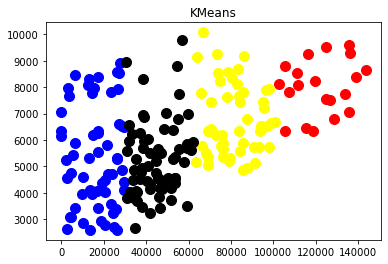

In [17]:
plt.scatter(X.values[Y_tahmin == 0,0],X.values[Y_tahmin == 0,1],s=100,c='red')
# burada X'in tahmin ve sonuç değerlerini alıcaz 
plt.scatter(X.values[Y_tahmin == 1,0],X.values[Y_tahmin == 1,1],s=100,c='blue')
plt.scatter(X.values[Y_tahmin == 2,0],X.values[Y_tahmin == 2,1],s=100,c='yellow')
plt.scatter(X.values[Y_tahmin == 3,0],X.values[Y_tahmin == 3,1],s=100,c='black')
# cluster'ları ekrana yazdırdık !!
plt.title('KMeans')
plt.show()